In [1]:
# Imporeting required libraries
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


In [2]:
# Importing our dataset
mall_cust_data = pd.read_csv("Mall_Customers.csv")
mall_cust_data.head()   # will display 1st five values(rows)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# checking if there is any NULL values : it is required for easy visualization
mall_cust_data.isnull().any().any()  # as we can see the output is 'False', so there are no null values
# and in case if there are some unll values , for this case we will make this zeros, ity is because we have to perform 
# numerical calculations. 

False

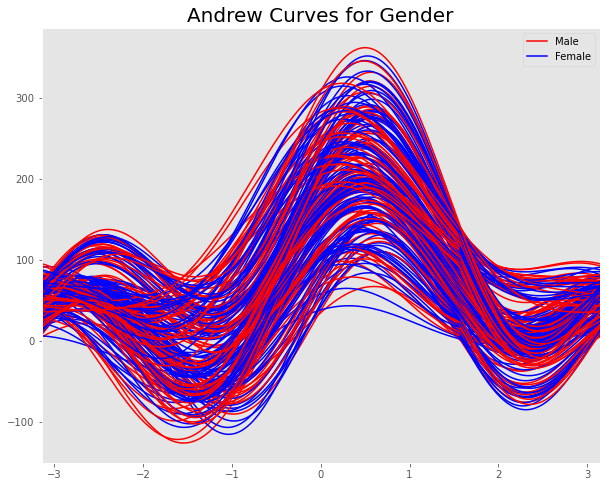

In [4]:
# Now we are going to visualize this dataset :
# Andew curves : Andrews curves plot is a way of visualizing the structure of independent variables. The possible usage is a 
# lightweight method of checking whether we have enough features to train a classifier or whether we should keep doing feature 
#engineering and cleaning data because there is a mess in data. We may do it because the independent variables get summarized 
#and the data dimensions get reduced to only two.

plt.figure(figsize=(10, 8))
x = pd.plotting.andrews_curves(mall_cust_data , "Genre" ,samples=250, color=('r','b') )
x.plot()
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

# It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances. Which means 
# that Andrews curves that are represented by functions close together suggest that the corresponding data points will also be 
#close together.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



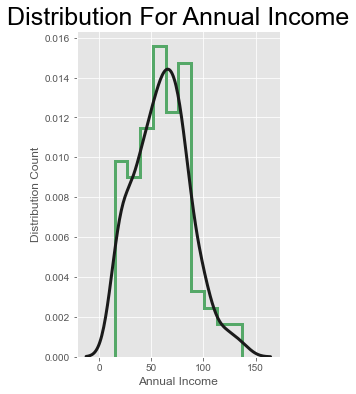

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



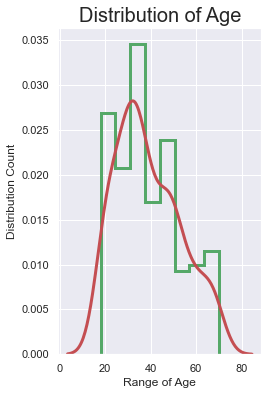

In [5]:
# now we are going to see the distribution plot using distplot for annual income , age and the spending score :
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
sns.set(style='darkgrid')
sns.distplot(mall_cust_data['Annual Income (k$)'] , rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})
plt.title('Distribution For Annual Income', fontsize = 25)
plt.xlabel('Annual Income')
plt.ylabel('Distribution Count')
plt.show()

plt.figure(figsize=(8,6))
plt.subplot(1, 2, 2)
sns.set(style = 'darkgrid')
sns.distplot(mall_cust_data['Age'], rug_kws={"color": "b"}, kde_kws={"color": "r", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Distribution Count')
plt.show()





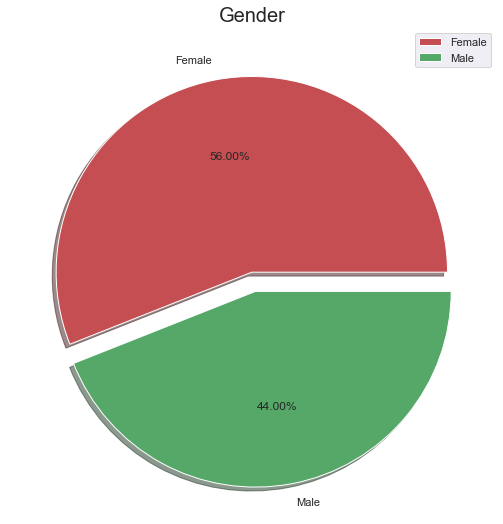

In [6]:
# In this visual , we will see  percentage shopping for male and female using pie chart :
labels = ['Female', 'Male']
size = mall_cust_data['Genre'].value_counts()
colors = ['r','g']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


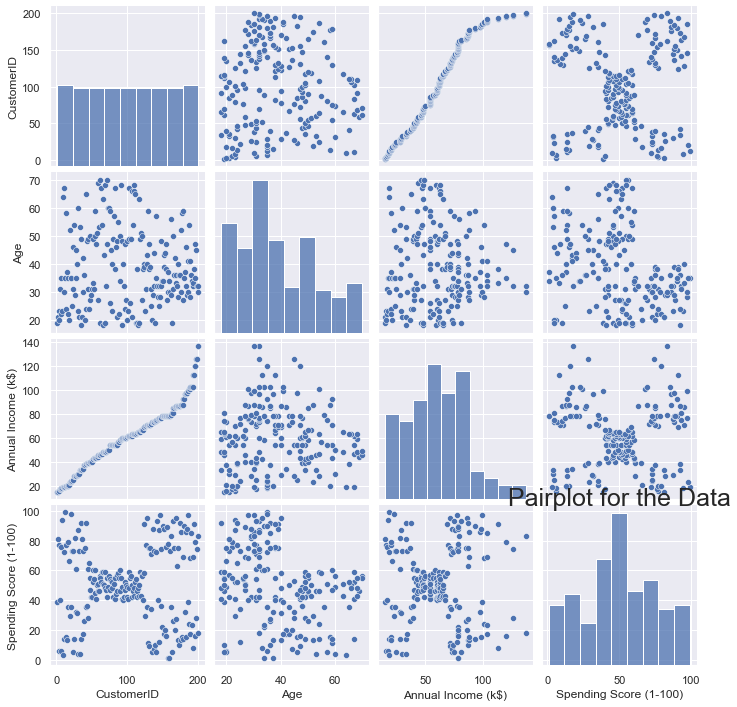

In [7]:
# Now to check corelation with in the dataset we are going to use pair plot :
sns.pairplot(mall_cust_data)
plt.title('Pairplot for the Data', loc='center', pad = 0.0 , fontsize = 25)
plt.show()

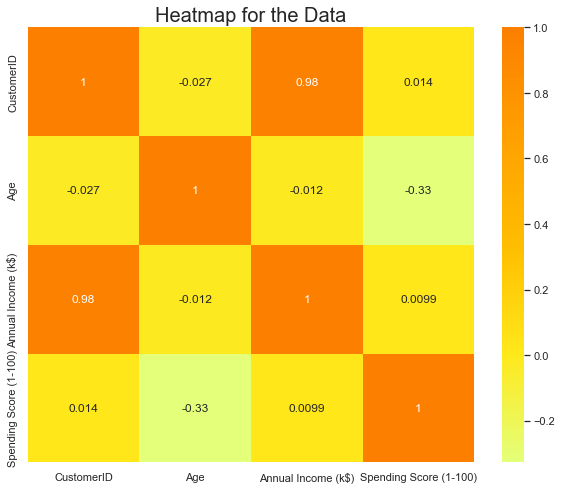

In [8]:
# Now for the sam ewe are going to use heatmap to show the correspondace of the data :
plt.figure(figsize=(10,8))
sns.heatmap(mall_cust_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



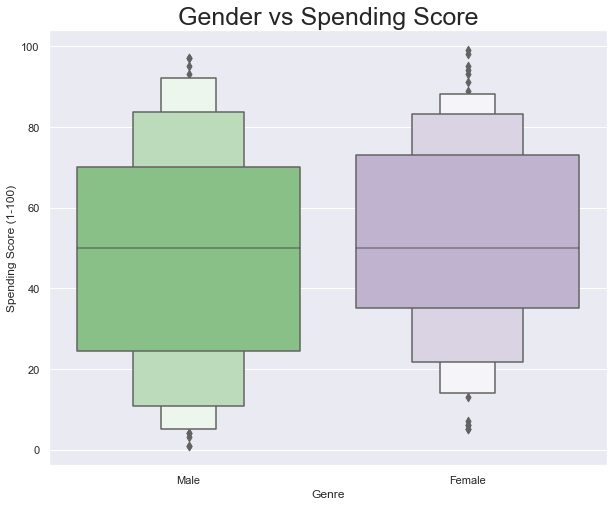

In [9]:
# Now lets compare the Spending Score with Gender using box plot :
#  Gender vs Spendscore

plt.figure(figsize=(10,8))
sns.boxenplot(mall_cust_data['Genre'], mall_cust_data['Spending Score (1-100)'], palette = 'Accent')
plt.title('Gender vs Spending Score', fontsize = 25)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



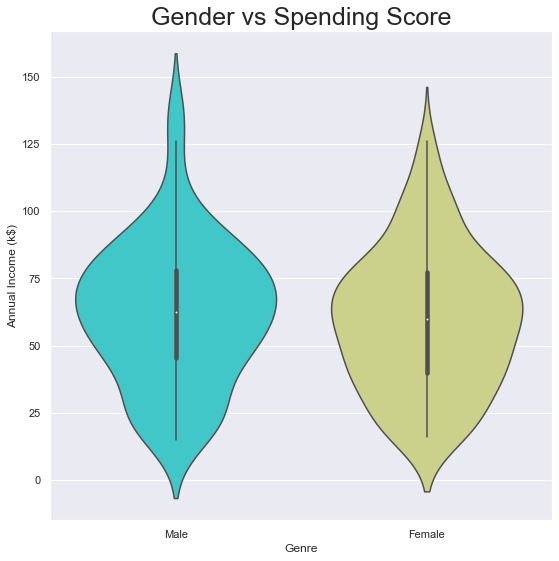

In [10]:
# Now compare the same using violin plot :
sns.violinplot(mall_cust_data['Genre'], mall_cust_data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 25)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



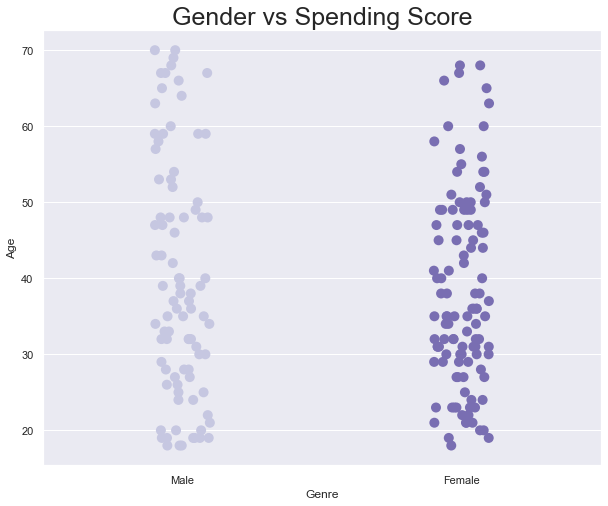

In [11]:
# And last compre gender with spending score using stir plot :
plt.figure(figsize=(10,8))
sns.stripplot(mall_cust_data['Genre'], mall_cust_data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 25)
plt.show()

In [12]:
# Now move Towards the main objective which is 'Clustering Analysis'
x = mall_cust_data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



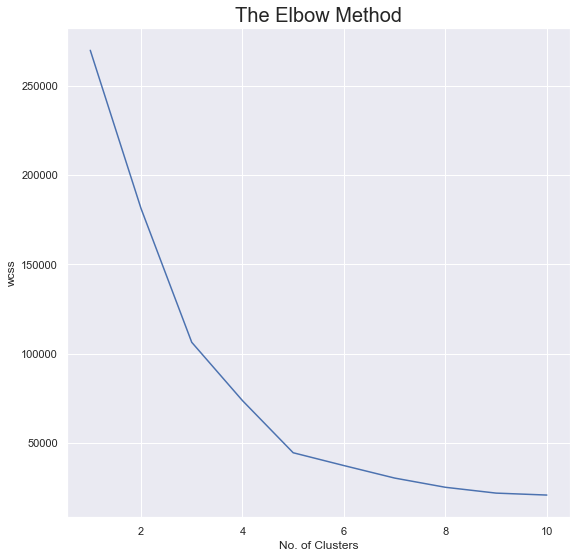

In [13]:
# Implementing K-means Algorithm for the Mall_customers dataset for segmentation : (Elbow method)
# Using this we are going to find the no. of clusters(K)

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()



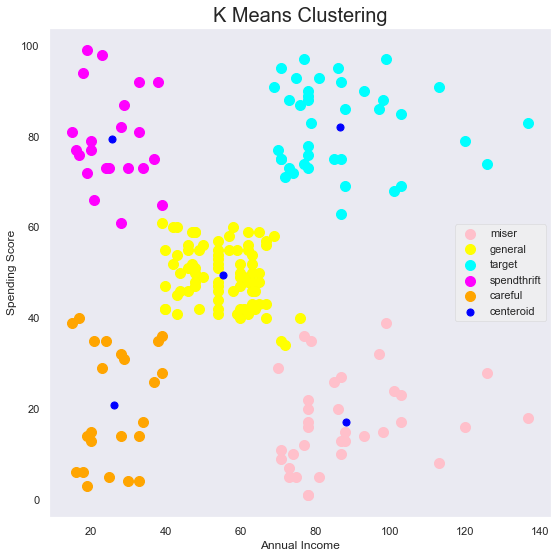

In [14]:
# Now lets visualize this clusters in order to understand the segmentation :
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()
# This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are 
# clearly Five segments of Customers namely Miser, General, Target, Spendthrift,  Careful based on their Annual Income and 
# Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

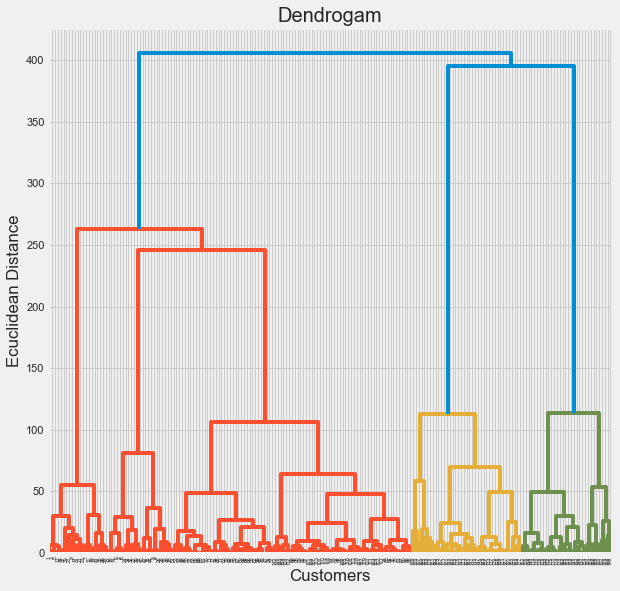

In [15]:
# Now implement Hierarchical Algorithm :
# Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups 
#called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects 
#within each cluster are broadly similar to each other.

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

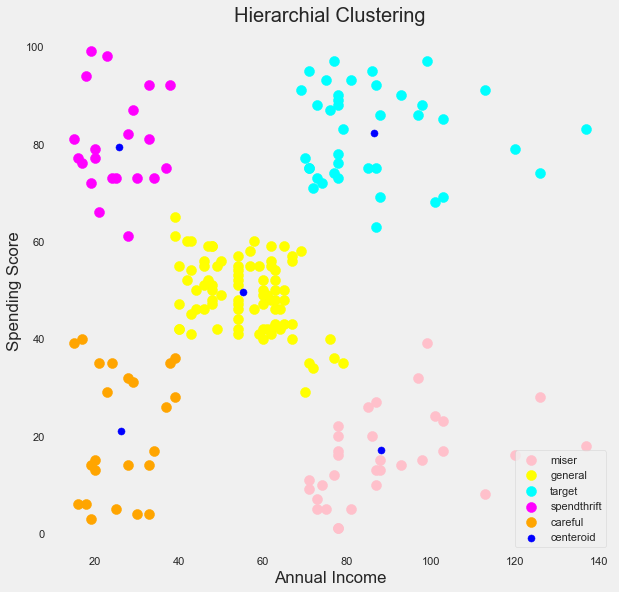

In [16]:
# Now as same as K-means , visualize the clusters for the Hierarchical Algorithm :
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [17]:
# Program 3 : Implement Distribution Model based Clustering 
from sklearn import mixture


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 0, 'n_comp')

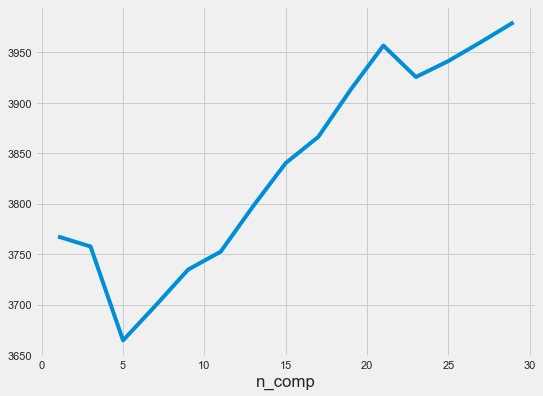

In [27]:
n_comp = np.arange(1,30,2)
model = [mixture.GaussianMixture(n, covariance_type='full',random_state=0).fit(x) for n in n_comp]
plt.figure(figsize=(8,6))
plt.plot(n_comp, [m.bic(x) for m in model], label='BIC')
plt.xlabel('n_comp')

In [24]:
#n_comp = np.arange(1,30,2)
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full', max_iter=100, init_params='random')
gmm.fit(x)
yclust = gmm.predict(x)

In [25]:
colors = ['r','b','g','m','k']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

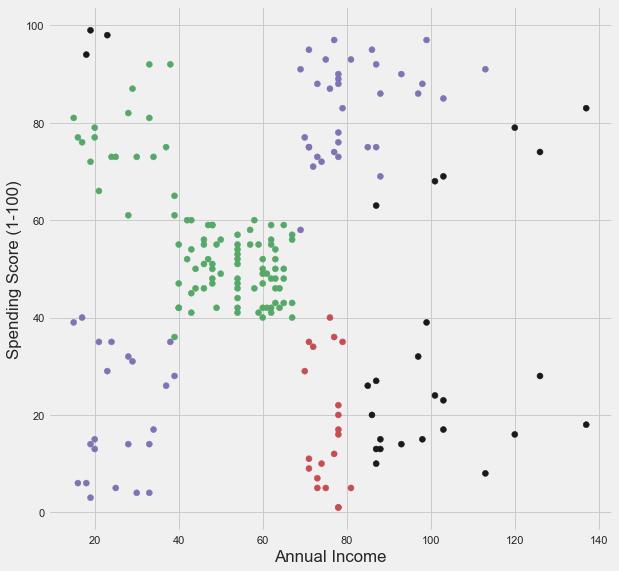

In [26]:
# Visualizing clusters :
plt.scatter(x[:, 0], x[:, 1], c=vectorizer(yclust))
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()